## 模拟生成低保真数据



### 首先是PBA储存模量LF

In [21]:
import numpy as np
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
from time import time
from scipy.optimize import curve_fit
import itertools
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso, BayesianRidge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor

DP = 40 拟合成功
DP = 162 拟合成功
DP = 274 拟合成功
DP = 454 拟合成功
DP = 611 拟合成功
DP = 798 拟合成功
DP = 1014 拟合成功
DP = 1184 拟合成功
DP = 1524 拟合成功


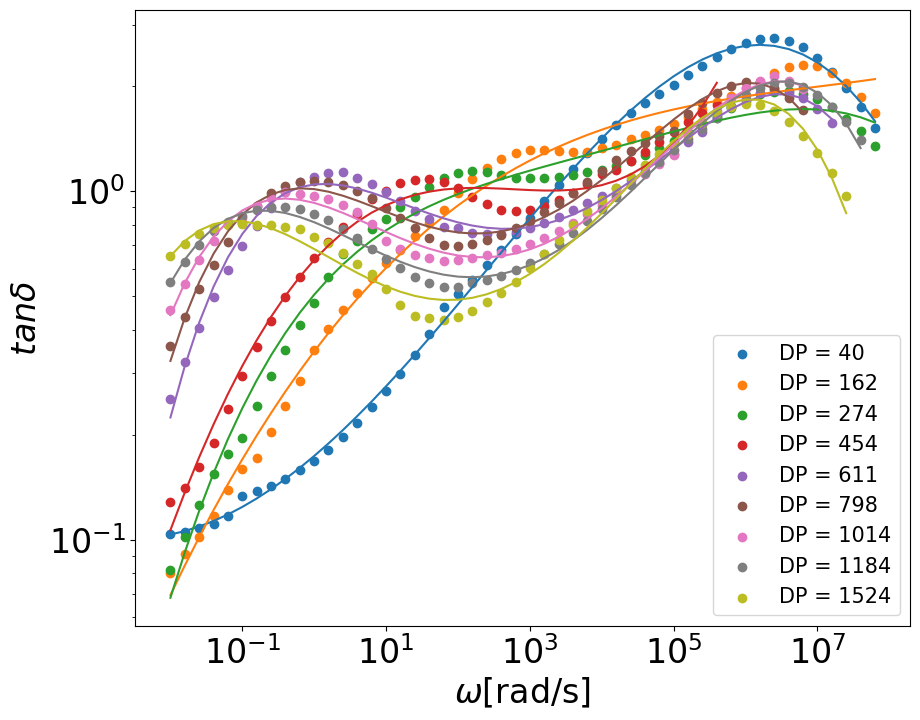

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# 读取实验数据
url_hf = 'Data_HF.xlsx'  # Excel 文件路径
df_HF = pd.read_excel(url_hf, sheet_name=None)
df_hf_sm = df_HF['Sheet2']  # 提取第一个工作表的数据

# 按照 'DP' 列进行分组
grouped = df_hf_sm.groupby('DP')

# 初始化一个字典来存储拟合结果
fit_results = {}

# 对每一组进行先对数化再多项式回归拟合
for name, group in grouped:
    # 提取 AngFreq 和 LossM 列的数据
    omega_experimental = group['AngFreq'].values.reshape(-1, 1)
    loss_experimental = group['LossFactor'].values

    # 对 omega 和 lossF 取对数
    log_omega = np.log(omega_experimental)
    log_loss = np.log(loss_experimental)

    # 使用多项式回归进行拟合（假设使用 3 次多项式）
    try:
        model = make_pipeline(PolynomialFeatures(degree=4), LinearRegression())
        model.fit(log_omega, log_loss)
        fit_results[name] = model
        print(f"DP = {name} 拟合成功")
    except Exception as e:
        print(f"DP = {name} 拟合失败，错误信息: {e}")
        fit_results[name] = None

# 创建图形
plt.figure(figsize=(10, 8))

# 对每一组生成预测曲线并绘图
for dp, model in fit_results.items():
    if model is None:
        continue  # 跳过拟合失败的组

    # 获取当前组的 AngFreq 数据
    group = grouped.get_group(dp)
    omega_virtual = group['AngFreq'].values.reshape(-1, 1)

    # 对 omega_virtual 取对数
    log_omega_virtual = np.log(omega_virtual)

    # 使用多项式回归模型预测
    log_loss_virtual = model.predict(log_omega_virtual)

    # 对预测结果取指数，还原为原始尺度
    loss_virtual = np.exp(log_loss_virtual)

    # 绘制预测曲线
    plt.plot(omega_virtual, loss_virtual)

    # 绘制原始数据点
    plt.scatter(group['AngFreq'], group['LossFactor'], label=f'DP = {dp}')

# 设置图形属性
plt.xscale('log')
plt.yscale('log')

# 设置横纵坐标标签字体大小
plt.xlabel('$\omega$$\mathrm{[rad/s]}$', fontsize=24)  # 横坐标标签字体大小
plt.ylabel('$tan\delta$', fontsize=24)  # 纵坐标标签字体大小

# 设置横纵坐标数值字体大小
plt.xticks(fontsize=24)  # 横坐标数值字体大小
plt.yticks(fontsize=24)  # 纵坐标数值字体大小

# 设置图例字体大小
plt.legend(fontsize=15)

plt.show()

## Doi_Edwards公式推导和模拟

\documentclass{article}
\usepackage{amsmath}
\usepackage{xcolor}
\pagestyle{empty}

\begin{document}

\[
\sigma(t) = G_0 \int_{-\infty}^{t} G(t - t') Q(E(t, t')) \, dt'
\]
\[
G(t) = \frac{8}{\pi^2} \sum_{p=1,3,5,\ldots}^{\infty} \frac{1}{p^2} \exp\left(-\frac{p^2 t}{\tau_d}\right)
\]
\[
\hat{\sigma}(\omega) = G_0 \hat{G}(\omega) \hat{\gamma}(\omega)
\]
\[
\hat{G}(\omega) = \frac{8}{\pi^2} \sum_{p=1,3,5,\ldots}^{\infty} \frac{1}{p^2} \frac{1}{1 + i \omega \tau_d / p^2}
\]

\end{document}


\documentclass{article}
\usepackage{amsmath}
\usepackage{xcolor}
\pagestyle{empty}

\begin{document}
\[
G^*(\omega) = G_0 \hat{G}(\omega) = G'(\omega) + i G''(\omega)
\]
\[
G'(\omega) = G_0 \frac{8}{\pi^2} \sum_{p=1,3,5,\ldots}^{\infty} \frac{1}{p^2} \frac{1}{1 + (\omega \tau_d / p^2)^2}
\]
\[
G''(\omega) = G_0 \frac{8}{\pi^2} \sum_{p=1,3,5,\ldots}^{\infty} \frac{1}{p^2} \frac{\omega \tau_d / p^2}{1 + (\omega \tau_d / p^2)^2}
\]
\[
\textcolor{red}{\tan \delta(\omega) = \frac{G''(\omega)}{G'(\omega)}}
\]
\end{document}